# Reproducing the spirit level

In [1]:
from urllib.request import urlopen, urlretrieve
import numpy as np
import json
import csv
from scipy.stats import linregress

import matplotlib.pyplot as plt

## Download and parse the data

In [2]:
undp_year = 2017
urlretrieve("""http://ec2-54-174-131-205.compute-1.amazonaws.com/API/HDRO_API.php/indicator_id=44206,136706/year="""+str(undp_year), "country_selection.json")

with open("country_selection.json", 'r') as f:
  data = json.load(f)

code2country = data['country_name']
assert code2country['SWE'] == 'Sweden'
country2code = {name:code for code, name in code2country.items()}
assert country2code['Sweden'] == 'SWE'

gdp_per_capita = {k: float(d['136706'][str(undp_year)]) for k, d in data['indicator_value'].items() if '136706' in d.keys()}
population = {k: float(d['44206'][str(undp_year)]) for k, d in data['indicator_value'].items() if '136706' in d.keys()}

names = data['indicator_name']
print("Parsed GDP data for %i countries and population data for %i countries" % (len(gdp_per_capita.keys()), len(population.keys())))

Parsed GDP data for 186 countries and population data for 186 countries


In [3]:
undp_year = 2017
with urlopen("""http://ec2-54-174-131-205.compute-1.amazonaws.com/API/HDRO_API.php/indicator_id=57206/year="""+str(undp_year)) as remote_data:
  data = json.load(remote_data)

infant_mortality = {k: float(d['57206'][str(undp_year)]) for k, d in data['indicator_value'].items() if '57206' in d.keys()}

print("Parsed infant mortality data for %i countries" % len(infant_mortality))

Parsed infant mortality data for 193 countries


### Expected education

In [4]:
undp_year = 2017
with urlopen("""http://ec2-54-174-131-205.compute-1.amazonaws.com/API/HDRO_API.php/indicator_id=69706/year="""+str(undp_year)) as remote_data:
  data = json.load(remote_data)

expected_education = {k: float(d['69706'][str(undp_year)]) for k, d in data['indicator_value'].items() if '69706' in d.keys()}

print("Parsed expecteed education years data for %i countries" % len(expected_education))

Parsed expecteed education years data for 193 countries


### Income inequality

In [5]:
data = list()
with urlopen("""https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/undp_data/Income%20inequality%2C%20quintile%20ratio.csv""") as remote_data:
  csvreader = csv.reader([line.decode('utf-8') for line in remote_data.readlines()], quotechar='"')
  for i, rowdata in enumerate(csvreader):
    # print(i, rowdata)
    try:
      data.append((rowdata[1].strip(), float(rowdata[2])))
    except:
      pass

quintile_inequality = {country2code[d[0]]:d[1] for d in data}
print("Parsed quintile income inequality data for %i countries" % len(quintile_inequality))

Parsed quintile income inequality data for 152 countries


### Prison population

They use a log scale in the book

In [6]:
def get_num(s):
  try:
    return float(s)
  except:
    return None

data = list()
with urlopen("""https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/undp_data/Prison%20population%20(per%20100%2C000%20people).csv""") as remote_data:
  csvreader = csv.reader([line.decode('utf-8') for line in remote_data.readlines()], quotechar='"')
  for i, rowdata in enumerate(csvreader):
    # print(i, rowdata)
    try:
      data.append((rowdata[1].strip(), [get_num(item) for item in rowdata[2:] if get_num(item) is not None][-1]))
    except:
      pass
prison_population = {country2code[d[0]]:np.log10(d[1]) for d in data if d[0] in country2code.keys()}
print("Parsed prison population data for %i countries" % len(prison_population))

Parsed prison population data for 192 countries


### Homicide rate

In [7]:
data = list()
with urlopen("""https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/undp_data/Homicide%20rate%20(per%20100%2C000%20people).csv""") as remote_data:
  csvreader = csv.reader([line.decode('utf-8') for line in remote_data.readlines()], quotechar='"')
  for i, rowdata in enumerate(csvreader):
    # print(i, rowdata)
    try:
      data.append((rowdata[1].strip(), [get_num(item) for item in rowdata[2:] if get_num(item) is not None][-1]))
    except:
      pass
homicide_rate = {country2code[d[0]]:d[1] for d in data if d[0] in country2code.keys()}
print("Parsed homicide rate data for %i countries" % len(homicide_rate))

Parsed homicide rate data for 167 countries


### GINI coefficient

In [8]:
data = list()
with urlopen("""https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/undp_data/Income%20inequality%2C%20Gini%20coefficient.csv""") as remote_data:
  csvreader = csv.reader([line.decode('utf-8') for line in remote_data.readlines()], quotechar='"')
  for i, rowdata in enumerate(csvreader):
    # print(i, rowdata)
    try:
      data.append((rowdata[1].strip(), [get_num(item) for item in rowdata[2:] if get_num(item) is not None][-1]))
    except:
      pass
gini = {country2code[d[0]]:d[1] for d in data if d[0] in country2code.keys()}
print("Parsed GINI coefficient data for %i countries" % len(homicide_rate))

Parsed GINI coefficient data for 167 countries


### Male STEM graduates

In [9]:
data = list()
with urlopen("""https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/undp_data/Share%20of%20graduates%20from%20STEM%20programmes%20in%20tertiary%20education%20who%20are%20male%20(%25).csv""") as remote_data:
  csvreader = csv.reader([line.decode('utf-8') for line in remote_data.readlines()], quotechar='"')
  for i, rowdata in enumerate(csvreader):
    # print(i, rowdata)
    try:
      data.append((rowdata[1].strip(), [get_num(item) for item in rowdata[2:] if get_num(item) is not None][-1]))
    except:
      pass
stem = {country2code[d[0]]:d[1] for d in data if d[0] in country2code.keys()}
print("Parsed male STEM graduates data for %i countries" % len(stem))
# Share of graduates from STEM programmes in tertiary education who are male (%)

Parsed male STEM graduates data for 129 countries


### Gender Equality Index (GII)

In [10]:
data = list()
with urlopen("""https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/undp_data/Gender%20Inequality%20Index%20(GII).csv""") as remote_data:
  csvreader = csv.reader([line.decode('utf-8') for line in remote_data.readlines()], quotechar='"')
  for i, rowdata in enumerate(csvreader):
    # print(i, rowdata)
    try:
      data.append((rowdata[1].strip(), [get_num(item) for item in rowdata[2:] if get_num(item) is not None][-1]))
    except:
      pass
gii = {country2code[d[0]]:d[1] for d in data if d[0] in country2code.keys()}
print("Parsed gender inequality index data for %i countries" % len(gii))
# Gender Inequality Index (GII)

Parsed gender inequality index data for 162 countries


# Data selection

Selected countries: {'NLD', 'FIN', 'SAU', 'DNK', 'DEU', 'IRL', 'NOR', 'FRA', 'KWT', 'CAN', 'GBR', 'HKG', 'CHE', 'USA', 'SWE', 'ARE', 'SGP', 'BEL', 'AUS', 'AUT'}


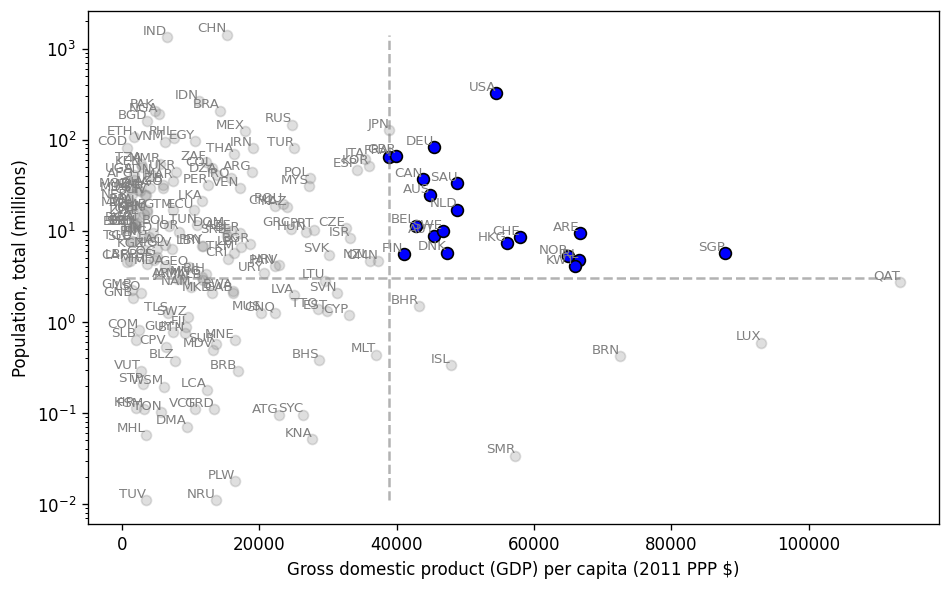

In [11]:
population_cutoff = 3 # 3 million in the book
n_countries = 20      # 20 countries in the book

countries = [c for c in code2country.keys() if c in gdp_per_capita.keys() and c in population.keys()]
gdp_per_capitas = np.sort([gdp_per_capita[c] for c in countries if population[c]>=population_cutoff])
included = [population[c]>=population_cutoff and gdp_per_capita[c]>=gdp_per_capitas[-n_countries] for c in countries]
assert np.sum(included) == n_countries

fig = plt.figure(figsize=(8, 5), dpi=120)
ax = fig.subplots(1, 1)

x = [gdp_per_capita[c] for i, c in enumerate(countries) if not included[i]]
y = [population[c] for i, c in enumerate(countries) if not included[i]]
ax.scatter(x, y, c='gray', alpha=.25)

x = [gdp_per_capita[c] for i, c in enumerate(countries) if included[i]]
y = [population[c] for i, c in enumerate(countries) if included[i]]
ax.scatter(x, y, c='blue', edgecolor='k', s=50)

a = np.asarray([gdp_per_capita[c] for c in countries])
ax.plot([a.min(), a.max()], population_cutoff*np.ones(2), '--', c='gray', alpha=.6)

a = np.asarray([population[c] for c in countries])
ax.plot(gdp_per_capitas[-n_countries]*np.ones(2), [a.min(), a.max()], '--', c='gray', alpha=.6)

for x, y, l in zip([gdp_per_capita[c] for i, c in enumerate(countries)],
                   [population[c] for i, c in enumerate(countries)], 
                   ["%s" % c for i, c in enumerate(countries)]):
  ax.text(x, y, l, fontsize=8, color='gray', horizontalalignment='right', verticalalignment='bottom')

ax.set_ylabel(names['44206'])  # Population
ax.set_xlabel(names['136706']) # GDP per capita

ax.set_yscale('log')

fig.tight_layout(pad=1)
fig.show()

selected_countries = set([c for i, c in enumerate(countries) if included[i]])
print("Selected countries:", selected_countries)

## Interactive parameter optimisation

In [12]:
print("Data unavailable for %s" % [code2country[c] for c in selected_countries.difference(infant_mortality.keys())])

has_data = set(quintile_inequality.keys()).intersection(set(infant_mortality.keys()))
x = np.asarray([quintile_inequality[c] for c in selected_countries if c in has_data])
y = np.asarray([infant_mortality[c] for c in selected_countries if c in has_data])
x_plot = np.asarray([x.min(), x.max()])

import ipywidgets as widgets

Data unavailable for ['Hong Kong, China (SAR)']


In [13]:
def plotline(intercept, slope):
  plt.figure(figsize=(5, 5), dpi=100)
  plt.scatter(x, y, c='lightblue', edgecolors='k', label="Data")

  plt.plot(x_plot, intercept + slope*x_plot, '-', c='blue')#), 
            #  label="Trendline ($R^2=%.2f$)" % (r_value**2), zorder=-1)
  e = np.sum((y - (intercept + slope*x))**2)
  # r2 = 1 - (e/np.sum((y-np.mean(y))**2))
  plt.title("Squared error: %.3f" % (e))
  plt.ylabel("Infant mortality rate (per 1k live births)")
  plt.xlabel("Inequality (20:20 ratio)")
  plt.show()

widgets.interact(plotline, intercept=(-2, 10, 0.1), slope=(-2, 2, 0.05));

interactive(children=(FloatSlider(value=4.0, description='intercept', max=10.0, min=-2.0), FloatSlider(value=0…

# Plotting



## Define the plotting function

In [14]:
def plot_inequality(data, label, remove_usa=False):
  has_data = set(quintile_inequality.keys()).intersection(set(homicide_rate.keys()))
  if remove_usa:
    has_data.remove('USA')

  fig = plt.figure(figsize=(13, 4), dpi=120)
  ax = fig.subplots(1, 3)
  # Points
  x = np.asarray([quintile_inequality[c] for c in selected_countries if c in has_data])
  y = np.asarray([data[c] for c in selected_countries if c in has_data])
  ax[0].scatter(x, y, c='lightblue', edgecolors='k', label="Data")
  ax[1].scatter(x, y, c='lightblue', edgecolors='k', zorder=10, label="Data")
  # Country codes
  for i, j, l in [(quintile_inequality[c], data[c], c) for c in selected_countries if c in has_data]:
    ax[0].text(i, j, l, fontsize=8, color='k', horizontalalignment='right', 
               verticalalignment='bottom', alpha=.8)
  # Regression line
  slope, intercept, r_value, p_value, std_err = linregress(x, y)
  a = np.asarray([x.min(), x.max()])
  ax[0].plot(a, intercept + slope*a, '-', c='blue', 
             label="Trendline ($R^2=%.2f$)" % (r_value**2), zorder=-1)
  ax[1].plot(a, intercept + slope*a, '-', c='blue', 
             label="Trendline ($R^2=%.2f$)" % (r_value**2))
  # Differences
  y_hat = intercept + slope*x
  for i, a, b, c in zip(range(len(x)), x, y, y_hat):
    ax[1].plot(a*np.ones(2), [b, c], 'orange', zorder=-1, label="Difference from trend line" if i==0 else None)
    ax[1].text(a, b, "%.1f" % ((b-c)**2), fontsize=8, color='k', 
               horizontalalignment='right', verticalalignment='bottom', 
               zorder=11, alpha=.8)

  ax[2].scatter(x, y-y_hat, c='blue', edgecolors='k', label="Residuals")
  ax[2].plot([x.min(), x.max()], [0, 0], 'k--', alpha=.8)
  sigma = np.std(y-y_hat)
  ax[2].fill_between([x.min(), x.max()], sigma*1.96*np.ones(2), -sigma*1.96*np.ones(2), 'gray', alpha=.2, label="95% CI")

  for i in range(3):
    ax[i].set_xlabel("Inequality (20:20 ratio)")
    ax[i].set_ylabel(label)
    ax[i].legend()
  a = list(ax[2].axis())
  a[2] *= 1.5
  a[3] *= 1.5
  ax[2].axis(a)
  fig.tight_layout(pad=1)
  fig.show()

## Homicide rate

Data unavailable for []


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


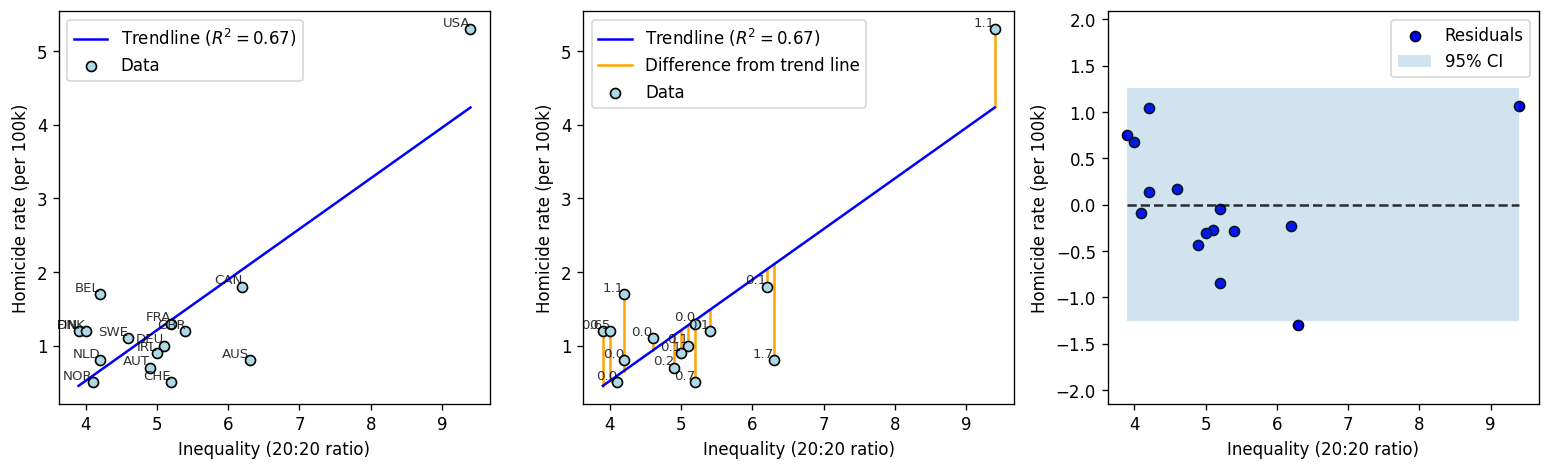

In [15]:
print("Data unavailable for %s" % [code2country[c] for c in selected_countries.difference(homicide_rate.keys())])
plot_inequality(homicide_rate, "Homicide rate (per 100k)", remove_usa=False)

## Prison population

Data unavailable for []


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


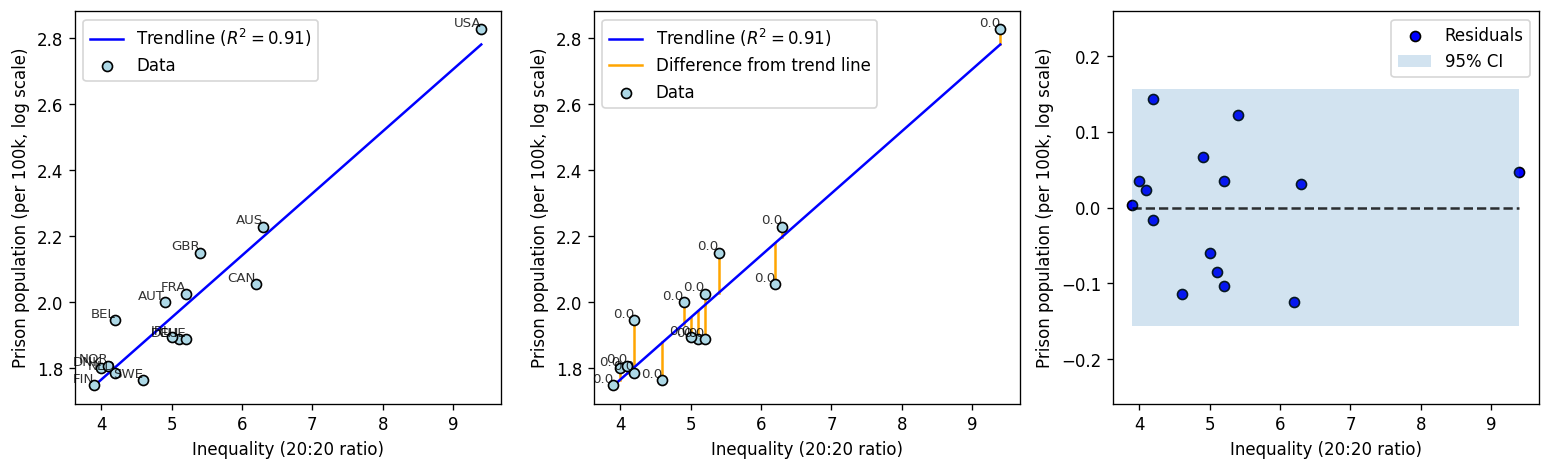

In [16]:
print("Data unavailable for %s" % [code2country[c] for c in selected_countries.difference(prison_population.keys())])
plot_inequality(prison_population, "Prison population (per 100k, log scale)")

## Infant mortality

Data unavailable for ['Hong Kong, China (SAR)']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


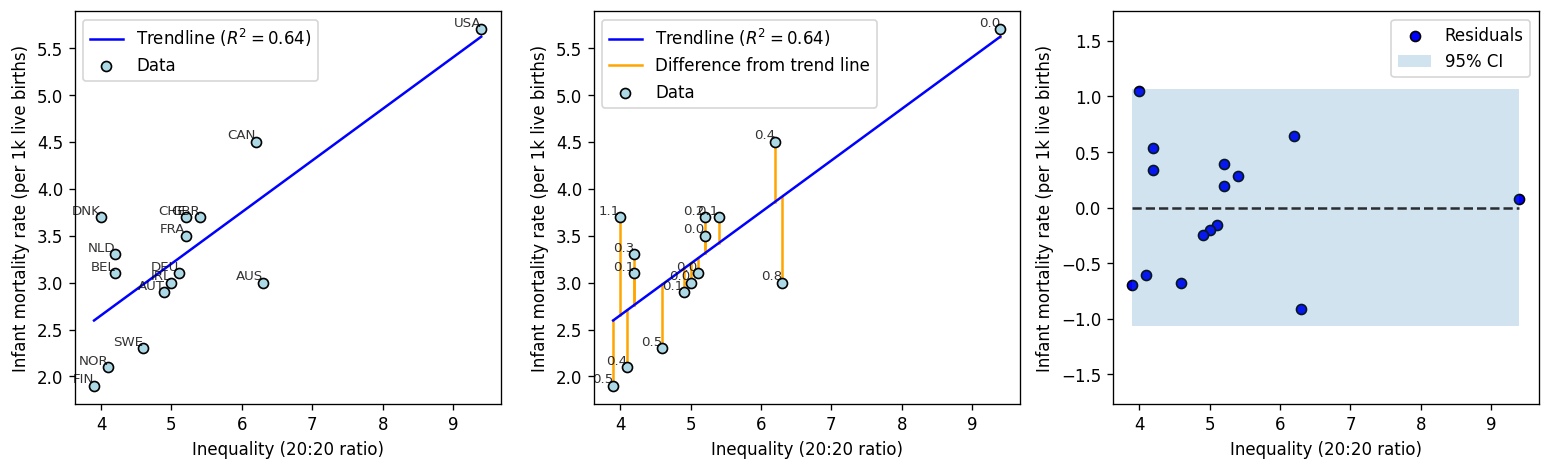

In [17]:
print("Data unavailable for %s" % [code2country[c] for c in selected_countries.difference(infant_mortality.keys())])
plot_inequality(infant_mortality, "Infant mortality rate (per 1k live births)")

# Gender Equality Paradox

In [18]:
n_countries = 40

has_data = set(gii.keys()).intersection(set(stem.keys()))
assert n_countries < len(has_data)
education_cutoff = np.sort([b for a, b in expected_education.items() if a in has_data])[-n_countries]
paradox_countries = [a for a, b in expected_education.items() if a in has_data and b >= education_cutoff]

Expected education cut-off: 15.257
p-value: 0.006537600055734936 <= 0.01 ('significant')


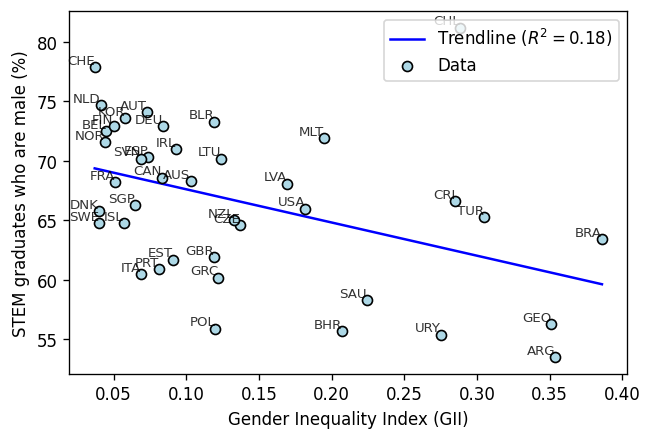

In [19]:
fig = plt.figure(figsize=(6, 4), dpi=120)
ax = fig.subplots(1)
# Points
x = np.asarray([gii[c] for c in paradox_countries])
y = np.asarray([stem[c] for c in paradox_countries])
ax.scatter(x, y, c='lightblue', edgecolors='k', label="Data")
# Country codes
for i, j, l in [(gii[c], stem[c], c) for c in paradox_countries]:
  ax.text(i, j, l, fontsize=8, color='k', horizontalalignment='right', 
          verticalalignment='bottom', alpha=.8)
# Regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
a = np.asarray([x.min(), x.max()])
ax.plot(a, intercept + slope*a, '-', c='blue', label="Trendline ($R^2=%.2f$)" % (r_value**2), zorder=-1)

ax.set_xlabel("Gender Inequality Index (GII)")
ax.set_ylabel("STEM graduates who are male (%)")
ax.legend()

# a = list(ax.axis())
# a[0] = x.min()
  # a[3] *= 1.5
# ax.axis(a)
  # fig.tight_layout(pad=1)
fig.show()

print("Expected education cut-off:", education_cutoff)
print("p-value:", p_value, end="")
if p_value < 0.01:
  print(" <= 0.01 ('significant')")
elif p_value < 0.05:
  print(" <= 0.05 ('significant')")
else:
  print(" > 0.05 ('non-significant')")

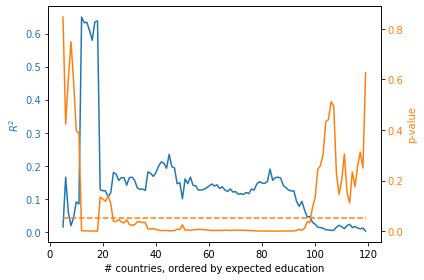

In [20]:
has_data = set(gii.keys()).intersection(set(stem.keys()))

p = list()
r = list()
x = list()
s = list()
for n_countries in range(5, len(has_data)):
  education_cutoff = np.sort([b for a, b in expected_education.items() if a in has_data])[-n_countries]
  paradox_countries = [a for a, b in expected_education.items() if a in has_data and b >= education_cutoff]
  slope, intercept, r_value, p_value, std_err = linregress(np.asarray([gii[c] for c in paradox_countries]),
                                                           np.asarray([stem[c] for c in paradox_countries]))
  x.append(n_countries)
  p.append(p_value)
  r.append(r_value**2)
  s.append(slope)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("# countries, ordered by expected education")
ax1.set_ylabel("$R^2$", color=color)
ax1.plot(x, r, color=color, label="Explained variance ($R^2$)")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('p-value', color=color)  # we already handled the x-label with ax1
ax2.plot(x, p, color=color, label="p-value")
ax2.plot([x[0], x[-1]], [0.05, 0.05], '--', color=color, label="Significance level 0.05")
ax2.tick_params(axis='y', labelcolor=color)


# ax1.legend()
# ax2.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()